# Calculating rice cell growth parameters

The purposes of this document is to walk through the calculations of growth parameters $\mu_{max}$ and starting inoculation densities $M_0$ for each flask. After these are parameters are determined for each flask, an attempt is made to find a linear relationship between $\mu_{max}$ and ${M}_0$ for each flask. Statistical t-tests are performed on each parameter to determine if they are statistically significant. All parameters are found to be statistically significant and a statistically sigificant relationship between the starting inoculation density and the growth rate is derived. A lower inoculation density is correlated with a faster growth rate. 

In [1]:
#importing packages for data analysis 
import numpy as np #for matricies and data analysis 
import matplotlib.pyplot as pt #for plotting
from scipy.stats import t #t distribution for T value and t test 
import itertools  

In [2]:
#data from experiments. This is cut and pasted from the excel spreadsheet
#the format is:
#      F1.1 F1.2 F1.3 F2.1 F2.2 F2.3 ... F5.1 F5.2 F5.3 
# day0
# day1 
#...
#day14 

raw_data = np.array([[7.552083333,8.901098901,6,5,0.714285714,3.760683761,-1.636363636,1,2.380952381,-1.136363636,-0.079365079,-0.175438596,74.33333333,0.331125828,-14.86666667],
[12.02020202,13.7037037,16.44444444,5.777777778,3.428571429,3.619047619,5.357142857,5.688073394,3.363636364,3.431372549,3.465346535,0.094339623,1.481481481,1.785714286,0.720720721],
[7.181818182,14.1509434,10.94736842,8.050847458,8.137254902,7.843137255,7,7.363636364,3.232323232,1.454545455,2.181818182,0.169491525,1.666666667,-0.095238095,1.1],
[14.140625,16.7961165,9.831932773,16.83333333,9.504950495,8,9.454545455,6.923076923,14.60869565,6.347826087,5.5,2.921348315,7.321428571,3.090909091,3.193277311],
[12.01834862,10.17241379,9.625,10.27272727,10.2020202,8.9,8.9,13.16831683,8.217821782,7.373737374,7.549019608,8.333333333,3.888888889,3.7,3.707865169],
[6.302521008,6.788990826,-4.672897196,9,7.981651376,5.619047619,8.518518519,10.27272727,12.10526316,8.434782609,6.818181818,9.797979798,2.666666667,7.222222222,5.4],
[9.545454545,9.019607843,10.65934066,12.77310924,9.724770642,7.948717949,11.68316832,8.764044944,10,9.56043956,16.2244898,10.99009901,14,10.97560976,9.62962963],
[11.44444444,14.5,7.564102564,10.18181818,6.333333333,8.737864078,12.35849057,6.7,11.83908046,10,11.08910891,8.854166667,14.7,12.73584906,10.92592593]])

[iMax,jMax] = raw_data.shape

for i in range(0,iMax):
    for j in range(0,jMax):
        if(raw_data[i,j]<0 ):
            raw_data[i,j]=0.001
        
print(raw_data.transpose())

days = [0,2,4,6,8,10,12,14] #change when additional days are added 

[[7.55208333e+00 1.20202020e+01 7.18181818e+00 1.41406250e+01
  1.20183486e+01 6.30252101e+00 9.54545455e+00 1.14444444e+01]
 [8.90109890e+00 1.37037037e+01 1.41509434e+01 1.67961165e+01
  1.01724138e+01 6.78899083e+00 9.01960784e+00 1.45000000e+01]
 [6.00000000e+00 1.64444444e+01 1.09473684e+01 9.83193277e+00
  9.62500000e+00 1.00000000e-03 1.06593407e+01 7.56410256e+00]
 [5.00000000e+00 5.77777778e+00 8.05084746e+00 1.68333333e+01
  1.02727273e+01 9.00000000e+00 1.27731092e+01 1.01818182e+01]
 [7.14285714e-01 3.42857143e+00 8.13725490e+00 9.50495049e+00
  1.02020202e+01 7.98165138e+00 9.72477064e+00 6.33333333e+00]
 [3.76068376e+00 3.61904762e+00 7.84313726e+00 8.00000000e+00
  8.90000000e+00 5.61904762e+00 7.94871795e+00 8.73786408e+00]
 [1.00000000e-03 5.35714286e+00 7.00000000e+00 9.45454545e+00
  8.90000000e+00 8.51851852e+00 1.16831683e+01 1.23584906e+01]
 [1.00000000e+00 5.68807339e+00 7.36363636e+00 6.92307692e+00
  1.31683168e+01 1.02727273e+01 8.76404494e+00 6.70000000e+00]


In [3]:
#processing raw data by averaging each run and putting it into proper array  
nDays = len(days)
nFlasks = 5
nTrials = 3 
F_all = np.ndarray(shape = (nDays, nFlasks, nTrials), dtype = float) #all the data together in nice, clean, 3d array 

i = 0 
j = 0 
flask = 0

#for rows in raw_data:
j = 0 
flask = 0 
for row in raw_data:
    j = 0
    flask = 0
    for num in row:
        F_all[i][flask][j-3*flask] = num
        #print("i is %d, flask is %d, j-3*flask is %d" % (i,flask,j-3*flask))
        if((j+1)%3==0):
            flask = flask + 1 
        j = j + 1

    i = i + 1     

F_avg = np.average(F_all,axis=2)
F_std = np.std(F_all,axis=2)
lF_all = np.log(F_all)
lF_avg = np.average(lF_all,axis=2)
lF_std = np.std(lF_all,axis=2)

Text(0,0.5,'log(g DW/L)')

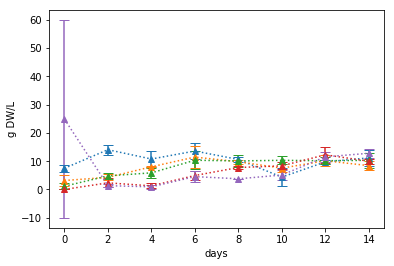

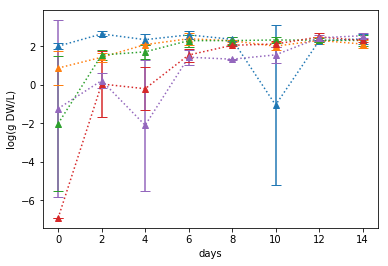

In [4]:
#plotting the data
pt.figure(1)
for i in range(0,5):
    pt.errorbar(days,F_avg[:,i],F_std[:,i],linestyle=':', marker='^',capsize=5)
pt.xlabel("days")
pt.ylabel("g DW/L")

pt.figure(2)
for i in range(0,5):
    pt.errorbar(days,lF_avg[:,i],lF_std[:,i],linestyle=':', marker='^',capsize=5)
pt.xlabel("days")
pt.ylabel("log(g DW/L)")

In [5]:
#inorder to calculate mu and M0 the end of the growth phase 
#needs to be determined. This is done by using a forloop that finds
#when the max inocculation density is reached. 
#currently it is a little buggy and needs to be fixed 

#this determines the end of the growth phase and is cur
#iGrowthEnds = np.ones(5)*len(days)
#nDays = F_avg.shape[0]
#nFlasks = F_avg.shape[1]
#for i in range(0,nFlasks):
#    prev = 0 
#    innerCalled = 0 
#    for j in range(0,nDays):
#        current = F_avg[j][i]
#        if(prev>current and not innerCalled):
#            iGrowthEnds[i] = int(j)
#            innerCalled = 1 
#        else:
#            prev = current
#iGrowthEnds[4] = int(len(days)) #because of stupid error bar 
#iGrowthEnds[1] = 4 #because of stupid error bar 

#for i in range(0,5):
#    iGrowthEnds[i] = int(iGrowthEnds[i])
#print(iGrowthEnds)
#print((iGrowthEnds[0:5]+1)*2-2)

#day growth ends
#dayGrowthEnds = np.array([4,4,6,6,10])
#iTest = (dayGrowthEnds+2)/2  
#print(iTest)
iGrowthEnds = [1,3,3,6,7]

Finally, we are onto the calculations. The first step is switching to a more farmilar, linear algebra notation that is inline with a book that I am using to go through this process. 

In [6]:
#now converting to d, G notation following inverse problems book layout 
m = np.size(days) #number of data points 
n = 2 #two model parameters 

#making G 
col1 = np.ones((m,1))
col2 = np.transpose(days) #x valus go in column 2 
G = np.matrix(np.column_stack((col1,col2)))

#defining data matrix d. Note that only d[:,i] is used in calculations 
d = np.matrix(lF_avg)

#defining sigma for data 
sigma_d = lF_std #s^2 != sigma^2 but we assume it does because what else?
print(d)


[[ 1.99991922  0.86585549 -2.01341824 -6.90775528 -1.23481754]
 [ 2.63474752  1.42412458  1.54327501  0.03830633  0.21511917]
 [ 2.33814432  2.08062305  1.70522173 -0.20670012 -2.10053983]
 [ 2.58527836  2.38487179  2.28765763  1.54163525  1.42677283]
 [ 2.35682598  2.27937653  2.29005672  2.04653531  1.32563753]
 [-1.05050109  2.00017736  2.32179177  2.11137767  1.5481303 ]
 [ 2.2739675   2.29834303  2.31046395  2.48038343  2.43319254]
 [ 2.37835559  2.11136535  2.29595227  2.2964789   2.54113559]]


Here we calculate the growth parameters without taking into account the error bars. This is how excel operates and what you would get from a typical, trendline fitting. The formula used is $\hat{\beta} = (G^{T}G)^{-1}G^Td$. The forloop ensures that the calculation is performed for each flask. The iGrowthEnds stuff is related to the fact that the growth phase ends for most of the flasks. Again, there is a bug here that needs to be fixed. 

In [7]:
Gmaster = G.copy() 
beta_unw = np.ndarray(shape=(2,5),dtype=float)
for i in range(0,nFlasks):
    G = G[0:int(iGrowthEnds[i]+1),:]
    Gt = np.transpose(G)
    dtmp = d[0:int(iGrowthEnds[i]+1),i]
    beta_unw[:,i] = (np.linalg.inv(Gt*G)*Gt*dtmp).flatten()
    G = Gmaster.copy() 
print(beta_unw)

[[ 1.99991922  0.90683662 -1.07909212 -3.54558044 -1.24595925]
 [ 0.31741415  0.26067737  0.65325872  0.61721061  0.2878983 ]]


Here the same calculation is performed again except taking into account the fact that there are errors in the dry weight measurements data. Those with higher standard deviations are weighted less heavily than those with smaller standard deviations. 
The weight matrix is given by $W = diag(\sigma_d)$. $G_{w} = WG$, $d_{w}=Wd$ and $\hat{\beta} = (G^T_wG_{w})^{-1}G_{w}^Td_{w}$. 
The covariance matrices for each flask parameters are also determined. The diagonal of the covariance matrices are the standard deviation for $\mu$ and the intercept b respectively. Calculating the coviarance matrix for beta involves using the formula $Cov(m_{L2}) = (G^T_wG_w)^{-1}G_w^TCov(d_w)G_w(G_w^TG_w)^{-1}$
we assume $Cov(d_w) = I_m $ since the data is composed of linearly independent measurements.

In [8]:
#calculating m taking into account std 
beta_w = np.ndarray(shape=(2,5),dtype=float) #beta wieghted 
betaCov_w = np.ndarray(shape=(5),dtype=np.matrix) #array of covariance matricies for each paramater 
[maxi,maxj] = sigma_d.shape 
for i in range(0,maxi):
    for j in range(0,maxj):
        if(sigma_d[i,j]==0): 
            sigma_d[i,j]=0.01
            
        
for i in range(0,nFlasks):
    G = G[0:int(iGrowthEnds[i]+1),:]
    dtmp = d[0:int(iGrowthEnds[i]+1),i]    
    W = np.diag(1./sigma_d[0:int(iGrowthEnds[i]+1),i])
    Gw = W*G
    Gwt = np.transpose(Gw)
    dw = W*dtmp
    beta_w[:,i] = (np.linalg.inv(Gwt*Gw)*Gwt*dw).flatten()
    betaCov_w[i] = (np.linalg.inv(Gwt*Gw)*Gwt*np.identity(int(iGrowthEnds[i])+1)*Gw*np.linalg.inv(Gwt*Gw))
    #print((np.linalg.inv(Gwt*Gw)*Gwt).shape)
    #print(x.shape)
    #betaCov_w[:][:][i]
    #calculating covariance matrix
    #invGwtGw = np.linalg.inv(Gwt*Gw) #thiis could be cleaned up. Will do later 
    #print((invGwtGw*Gwt*np.identity(m)*Gw*invGwtGw))
    #print(x)
    G = Gmaster.copy() 

#print(beta_w)
print(beta_w)

[[ 1.99991922  0.99095702  1.11244535 -6.90199408 -0.37424023]
 [ 0.31741415  0.27214401  0.18891836  1.05798941  0.21306104]]


The y intercept, b, determined in the previous calculation equals the natural log of the starting inoculation density. To determine the initial inocculation density $M0 = exp(b)$ and the standard deviation is given by $\sigma_{M_0}=\sigma_b*M_0$. 

In [9]:
M0 = np.zeros(5)
M0_std = np.zeros(5)
mu_std = np.zeros(5)

mu_w_array = np.zeros(5)
b_w_array = np.zeros(5)

for i in range(0,nFlasks):
    #print(cov_m)
    mu_std[i] = betaCov_w[i][1,1]
    mu_w_array[i] = beta_w[1,i]
    b_w_array[i] = beta_w[0,i]
    
    print("Flask %d"%(i+1))
    print("mu_%d is = %0.3f +/- %0.4f" % (i+1,beta_w[1,i],betaCov_w[i][1,1]))
    M0[i] = np.exp(beta_w[0,i])
    M0_std[i] = betaCov_w[i][0,0]*M0[i]
    print("starting inocculation density is %0.3f +/- %0.4f"%(M0[i],M0_std[i]))

    print("")

Flask 1
mu_1 is = 0.317 +/- 0.0107
starting inocculation density is 7.388 +/- 0.1933

Flask 2
mu_2 is = 0.272 +/- 0.0075
starting inocculation density is 2.694 +/- 0.3214

Flask 3
mu_3 is = 0.189 +/- 0.0091
starting inocculation density is 3.042 +/- 0.4379

Flask 4
mu_4 is = 1.058 +/- 0.0000
starting inocculation density is 0.001 +/- 0.0000

Flask 5
mu_5 is = 0.213 +/- 0.0003
starting inocculation density is 0.688 +/- 0.0147



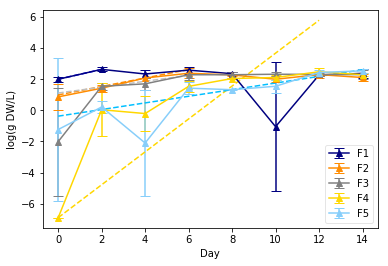

In [10]:
ax = pt.figure(3)
colors2 = itertools.cycle(['blue','darkorange','silver','gold','deepskyblue'])
colors1 = itertools.cycle(['navy','darkorange','gray','gold','lightskyblue'])
for i in range(0,5):
    lb = "F"+str(i+1)
    #print(lb)
    xValues = np.linspace(0,iGrowthEnds[i]*2,num=100)
    pt.errorbar(days,lF_avg[:,i],lF_std[:,i],linestyle='-', marker='^',capsize=5,color=next(colors1),label=lb)
    pt.plot(xValues,mu_w_array[i]*xValues+ b_w_array[i],'--',color=next(colors2))
pt.legend(framealpha=0.5)


pt.xlabel("Day")
pt.ylabel("log(g DW/L)")
pt.savefig('output.png', dpi=300)


We use the following hypothosis testing framework $T_0 = \frac{| {{ \hat{\beta_1}-\beta_{1,0}| }}}{SE(\hat{\beta_1})}$ with the assumption that $SE(\hat{\beta_1}) = \sigma_{{\beta_1}}$ and $\beta_{1,0} = 0 $ 

In [11]:
#hypothosis testing prob that these things are real 
for i in range(0,nFlasks):
    sigma_b = betaCov_w[i][0,0] #SE
    sigma_mu = betaCov_w[i][1,1]
    
    T0_mu = abs(beta_w[0,i]-0)/sigma_mu #for slope 
    T0_b = abs(beta_w[1,i]-0)/sigma_b #for slope 

    p_mu = (1 - t.cdf(T0_mu,df=m-n))*2
    p_b = (1 - t.cdf(T0_b,df=m-n))*2 

    print("flask %d: p_mu is %.2E and p_b is %.2E" %(i+1,p_mu,p_b))


flask 1: p_mu is 1.56E-12 and p_b is 1.91E-05
flask 2: p_mu is 1.23E-11 and p_b is 6.27E-02
flask 3: p_mu is 2.01E-11 and p_b is 2.37E-01
flask 4: p_mu is 0.00E+00 and p_b is 0.00E+00
flask 5: p_mu is 0.00E+00 and p_b is 5.96E-05


(5, 2)
[[ 0.91226932 -0.86131632]]

[[ 0.00033767 -0.00031916]
 [-0.00031916  0.00030167]]
flask 5: p_mu is 0.00E+00 and p_b is 0.00E+00


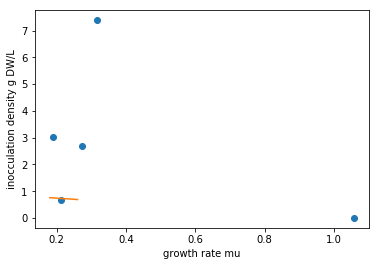

In [12]:
col2 = np.transpose(beta_w[1,:])
col1 = np.ones((len(col2),1))


G = np.matrix(np.column_stack((col1,col2)))
print(G.shape)
d = np.matrix(M0).transpose()

W = np.diag(1./M0_std)
Gw = W*G
Gwt = np.transpose(Gw)
dw = np.matrix(W*d)

beta_muM0 = (np.linalg.inv(Gwt*Gw)*Gwt*dw).flatten()
betaCov_muM0 = (np.linalg.inv(Gwt*Gw)*Gwt*np.identity(5)*Gw*np.linalg.inv(Gwt*Gw))
print(beta_muM0)
print("")
print(betaCov_muM0)
xPoints = np.linspace(0.18,0.26,num=100)
pt.figure(3)
pt.plot(beta_w[1,:],M0,'o')
pt.xlabel("growth rate mu")
pt.ylabel("inocculation density g DW/L")
pt.plot(xPoints,beta_muM0[0,1]*xPoints+beta_muM0[0,0],'-')

T0_mu = abs(beta_muM0[0,1]-0)/betaCov_muM0[1,1] #for slope 
T0_b = abs(beta_w[0,0]-0)/betaCov_muM0[0,0]  #for slope 
p_mu = (1 - t.cdf(T0_mu,df=m-n))*2
p_b = (1 - t.cdf(T0_b,df=m-n))*2 
print("flask %d: p_mu is %.2E and p_b is %.2E" %(i+1,p_mu,p_b))


[[ 1.05810334 -1.09508057]]

[[ 1.16981210e-09 -1.69277539e-09]
 [-1.69277539e-09  1.75920398e-07]]

6224864.105334481
flask 5: p_mu is 0.00000E+00 and p_b is 0.00E+00
[[0.31741415 0.27214401 0.18891836 1.05798941 0.21306104]]
[[-0.09249124 -0.13776139 -0.22098704  0.64808402 -0.19684435]]
R^2 is -120.051718 


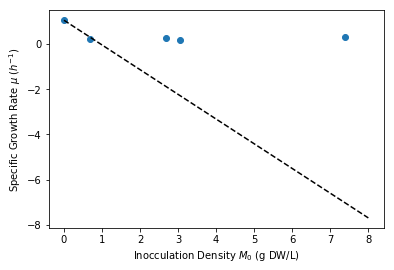

In [13]:
#now mu 
col1 = np.ones((5,1))
col2 = np.transpose(np.matrix(M0))
G = np.matrix(np.column_stack((col1,col2)))
d = np.matrix(beta_w[1,:]).transpose()
W = np.diag(1./mu_std)
Gw = W*G
Gwt = np.transpose(Gw)
dw = np.matrix(W*d)

beta_muM0 = (np.linalg.inv(Gwt*Gw)*Gwt*dw).flatten()
betaCov_muM0 = (np.linalg.inv(Gwt*Gw)*Gwt*np.identity(5)*Gw*np.linalg.inv(Gwt*Gw))
print(beta_muM0)
print("")
print(betaCov_muM0)
print("")
xPoints = np.linspace(0,8,num=100)
pt.figure(3)
pt.plot(M0,beta_w[1,:],'o')
pt.ylabel("Specific Growth Rate ${\mu}$ $(h^{-1})$ ")
pt.xlabel("Inocculation Density $M_0$ (g DW/L)")
pt.plot(xPoints,beta_muM0[0,1]*xPoints+beta_muM0[0,0],'--',color="k")

T0_mu = abs(beta_muM0[0,1]-0)/betaCov_muM0[1,1] #for slope 
print(T0_mu)
T0_b = abs(beta_w[0,0]-0)/betaCov_muM0[0,0]  #for intercept 

p_mu = (1 - t.cdf(T0_mu,df=m-n))*2
p_b = (1 - t.cdf(T0_b,df=m-n))*2 
print("flask %d: p_mu is %.5E and p_b is %.2E" %(i+1,p_mu,p_b))
pt.savefig('muVsM0.png', dpi=300)

#R^2 calculation
beta = beta_muM0.transpose()
SStot = ((d-G*beta).transpose()*(d-G*beta))[0,0]
avg = np.average(d)
print(d.flatten()[0,:])
print(d.flatten()-avg)
SSreg = np.sum(np.asarray(d.flatten()-avg)**2)
Rsqr = 1-SStot/SSreg
print(("R^2 is %0.6f ")%(Rsqr))
